In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings

In [27]:
df = pd.read_csv("LUBS5990M_courseworkData_2324.csv")
df.head()

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,1,N,Is One of Its Kind ERC-20 Decentralized Stable...,1,4.0,30.00,Singapore,10/01/2019,10/01/2019,31.0,1,1,Ethereum,5.099990e+05,0,0.49
1,2,N,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,09/07/2018,10/12/2018,20.0,1,1,XAYA,2.250000e+08,1,0.41
2,3,N,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,07/01/2019,30/06/2020,10.0,1,1,Stellar,5.000000e+09,1,0.40
3,4,Y,International Real Estate Crowdfunding Platform,1,4.3,NaN,Netherlands,10/01/2019,15/12/2019,27.0,1,1,Separate blockchain,1.250000e+08,1,0.13
4,5,N,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,28/07/2019,30/11/2019,14.0,1,1,Ethereum,5.000000e+09,1,0.50


Overview of Data

In [28]:
df.shape

(2767, 16)

In [29]:
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Variables: ", numerical_vars)

categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables: ", categorical_vars)

Numerical Variables:  ['ID', 'hasVideo', 'rating', 'priceUSD', 'teamSize', 'hasGithub', 'hasReddit', 'coinNum', 'minInvestment', 'distributedPercentage']
Categorical Variables:  ['success', 'brandSlogan', 'countryRegion', 'startDate', 'endDate', 'platform']


In [30]:
for col in numerical_vars:
    unique_count = df[col].nunique()
    print(f"Unique value count for'{col}': {unique_count}")

Unique value count for'ID': 2767
Unique value count for'hasVideo': 2
Unique value count for'rating': 39
Unique value count for'priceUSD': 274
Unique value count for'teamSize': 53
Unique value count for'hasGithub': 2
Unique value count for'hasReddit': 2
Unique value count for'coinNum': 855
Unique value count for'minInvestment': 2
Unique value count for'distributedPercentage': 111


In [31]:
original_numerical_values = ['rating', 'priceUSD', 'teamSize', 'coinNum', 'distributedPercentage']
for col in categorical_vars:
    unique_count = df[col].nunique()
    print(f"Unique value count for '{col}': {unique_count}")

Unique value count for 'success': 2
Unique value count for 'brandSlogan': 2763
Unique value count for 'countryRegion': 115
Unique value count for 'startDate': 760
Unique value count for 'endDate': 776
Unique value count for 'platform': 130


In [32]:
summary = df[original_numerical_values].describe()
summary

,rating,priceUSD,teamSize,coinNum,distributedPercentage
count,2767.000000,2587.000000,2613.000000,2.767000e+03,2767.000000
mean,3.121323,19.014036,13.107539,8.177880e+12,1.061370
std,0.714452,775.287126,8.082433,4.300018e+14,17.485513
min,1.000000,0.000000,1.000000,1.200000e+01,0.000000
25%,2.600000,0.040000,7.000000,5.000000e+07,0.400000
50%,3.100000,0.120000,12.000000,1.800000e+08,0.550000
75%,3.700000,0.500000,17.000000,6.000000e+08,0.700000
max,4.800000,39384.000000,75.000000,2.261908e+16,869.750000


In [33]:
import pandas as pd

# Selecting the first 16 columns
columns_to_analyze = df.columns[:16].tolist()
df_subset = df[columns_to_analyze]

# Separate numerical and categorical columns
numerical_cols = df_subset.select_dtypes(include='number').columns
categorical_cols = df_subset.select_dtypes(exclude='number').columns

# Numerical summary
numerical_summary = df_subset[numerical_cols].describe()

# Categorical summary
categorical_summary = {}
for col in categorical_cols:
    categorical_summary[col] = {
        'mode': df_subset[col].mode()[0],  # Most frequent value
        'value_counts': df_subset[col].value_counts()  # Frequency counts
    }

# Printing the results
print("Numerical Summary:")
print(numerical_summary)

print("\nCategorical Summary:")
for col, stats in categorical_summary.items():
    print(f"\nColumn: {col}")
    print(f"Mode: {stats['mode']}")
    print("Value Counts:")
    print(stats['value_counts'][:5])  # Display top 5 values for brevity

# The numerical summary provides basic statistical details (count, mean, etc.)
# The categorical summary displays the mode and value counts for each categorical column


Numerical Summary:
                ID     hasVideo       rating      priceUSD     teamSize  \
count  2767.000000  2767.000000  2767.000000   2587.000000  2613.000000   
mean   1384.000000     0.726057     3.121323     19.014036    13.107539   
std     798.908422     0.446061     0.714452    775.287126     8.082433   
min       1.000000     0.000000     1.000000      0.000000     1.000000   
25%     692.500000     0.000000     2.600000      0.040000     7.000000   
50%    1384.000000     1.000000     3.100000      0.120000    12.000000   
75%    2075.500000     1.000000     3.700000      0.500000    17.000000   
max    2767.000000     1.000000     4.800000  39384.000000    75.000000   

         hasGithub    hasReddit       coinNum  minInvestment  \
count  2767.000000  2767.000000  2.767000e+03    2767.000000   
mean      0.577882     0.632815  8.177880e+12       0.453198   
std       0.493986     0.482125  4.300018e+14       0.497895   
min       0.000000     0.000000  1.200000e+01    

C:\Users\ajaia\AppData\Local\Temp\ipykernel_5368\1274334729.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[col].value_counts().index, y=(df[col].value_counts() / total) * 100, palette='viridis')
C:\Users\ajaia\AppData\Local\Temp\ipykernel_5368\1274334729.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[col].value_counts().index, y=(df[col].value_counts() / total) * 100, palette='viridis')
C:\Users\ajaia\AppData\Local\Temp\ipykernel_5368\1274334729.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[co

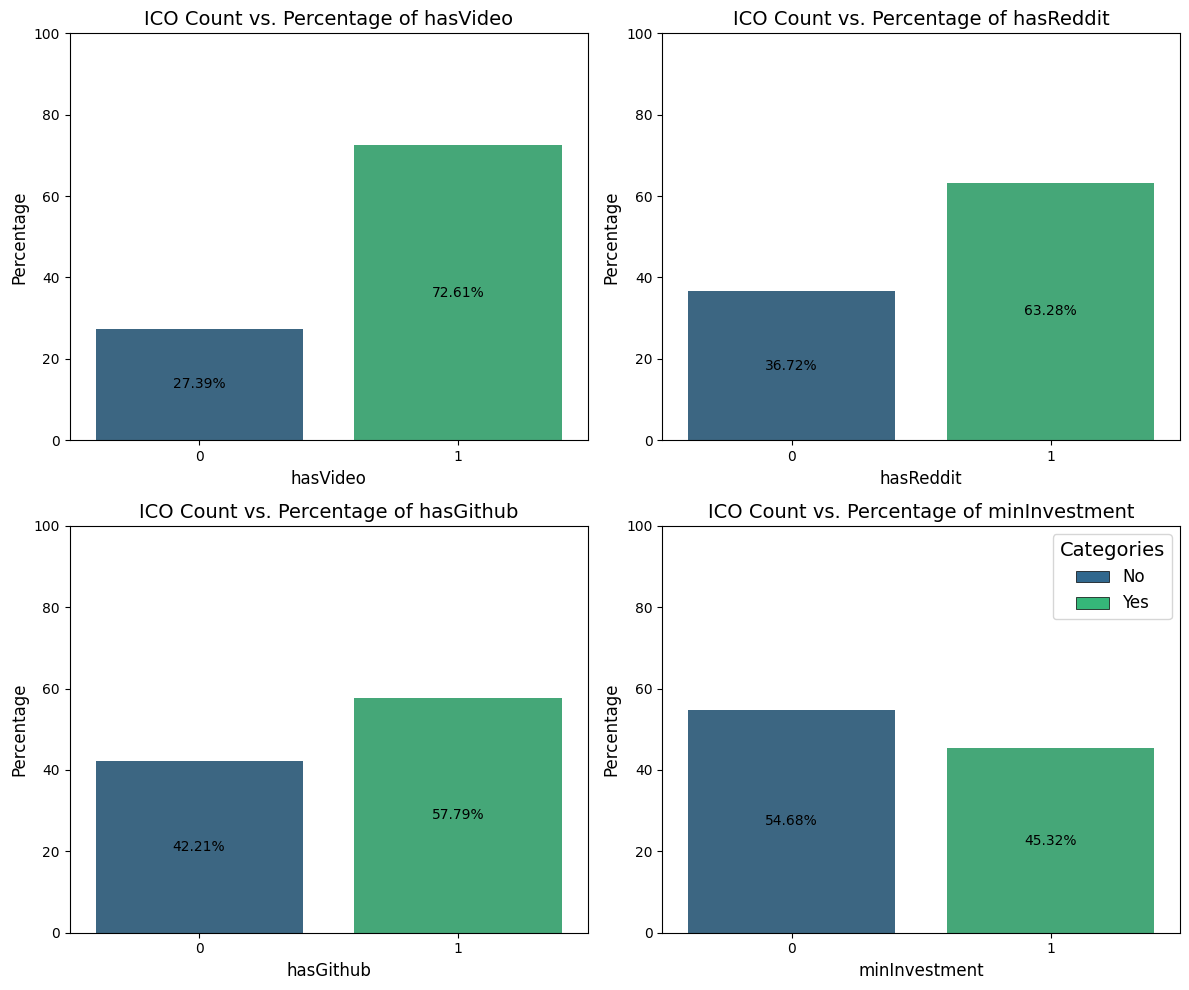

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Define the list of categorical predictors
categorical_predictors = ['hasVideo', 'hasReddit', 'hasGithub', 'minInvestment']

# Set optimal figure size
plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_predictors, 1):  # Start enumeration from 1
    # Calculate the percentage for each category
    total = df[col].value_counts().sum()
    plt.subplot(2, 2, i)  # Create subplots in a 2x2 grid
    ax = sns.barplot(x=df[col].value_counts().index, y=(df[col].value_counts() / total) * 100, palette='viridis')
    plt.title(f'ICO Count vs. Percentage of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage
    for p in ax.patches:  # Adding annotations to each bar
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2),
                    ha='center', va='center', fontsize=10, color='black')
    plt.grid(False)

# Add custom legend with colors from 'viridis' palette
handles = [plt.Rectangle((0,0),1,1, color=sns.color_palette("viridis", 2)[i], ec="k", lw=0.5) for i in range(2)]
labels = ['No', 'Yes']
plt.legend(handles, labels, title='Categories', loc='upper right', fontsize=12, title_fontsize='14')

plt.tight_layout()
plt.show()


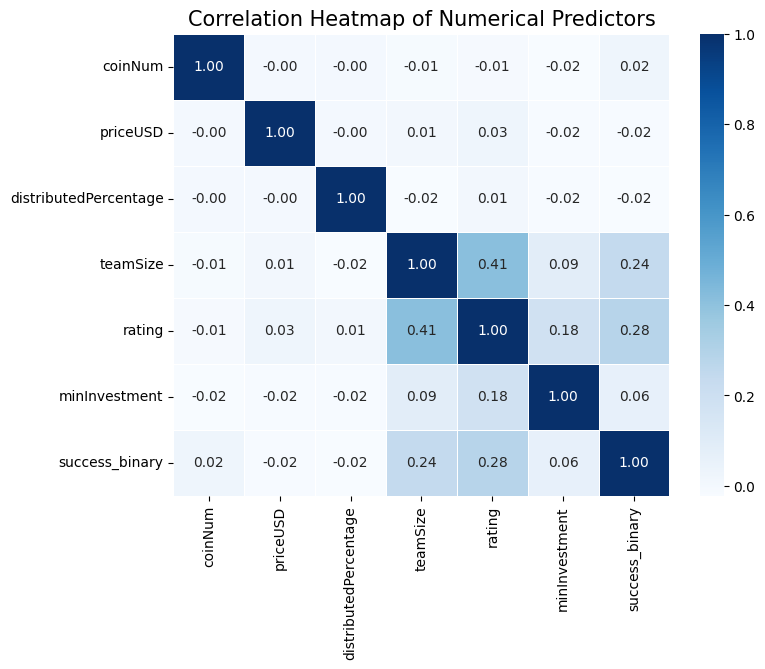

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('LUBS5990M_courseworkData_2324.csv')
data['success_binary'] = data['success'].apply(lambda x: 1 if x == 'Y' else 0)

# Numerical Predictors
numerical_predictors = ['coinNum', 'priceUSD', 'distributedPercentage', 'teamSize', 'rating', 'minInvestment']
corr_matrix = data[numerical_predictors + ['success_binary']].corr()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Predictors", fontsize=15)
plt.show()





Data Quality


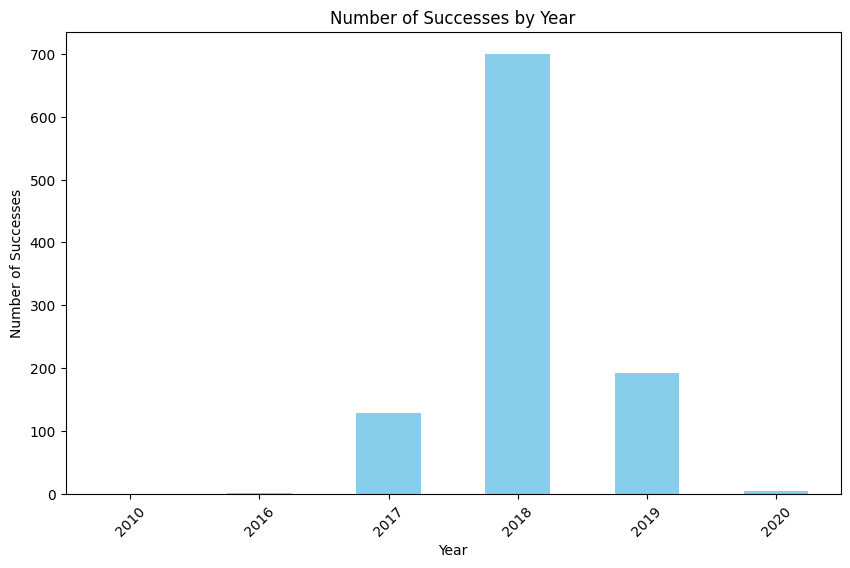

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format and 'success' is categorized correctly
df['startDate'] = pd.to_datetime(df['startDate'], format='%d/%m/%Y', errors='coerce')
df['success'] = df['success'].apply(lambda x: 1 if x == 'Y' else 0)

# Extract the year from the startDate
df['startYear'] = df['startDate'].dt.year

# Group by year and sum up successes
success_by_year = df.groupby('startYear')['success'].sum()

# Plotting the results
plt.figure(figsize=(10, 6))
success_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Successes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Successes')
plt.xticks(rotation=45)
plt.grid(False)  # Remove grid lines
plt.show()


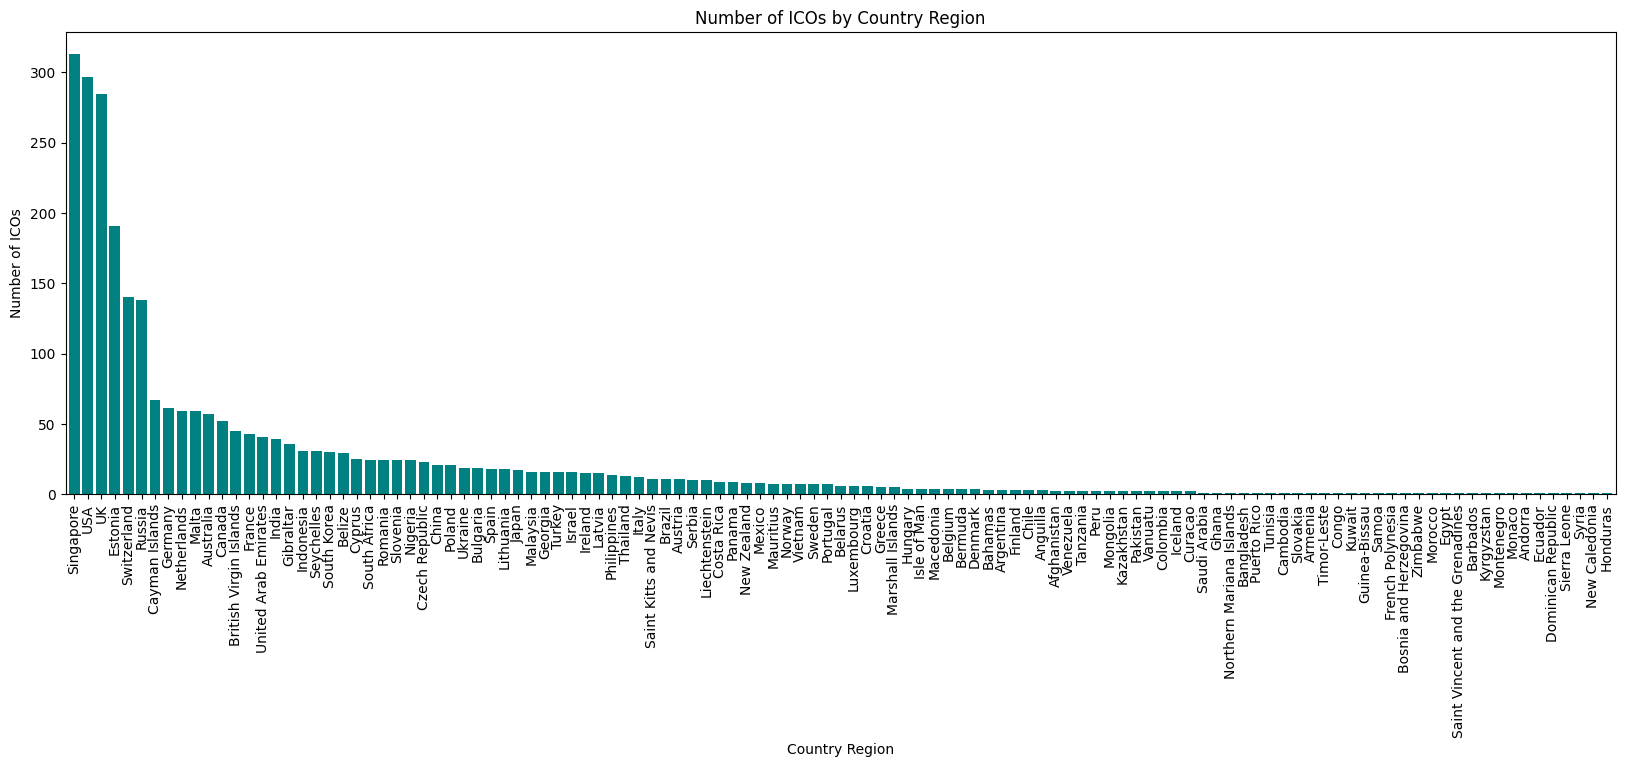

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Count ICOs per country region
ico_counts = df['countryRegion'].value_counts()

# Plotting the results
plt.figure(figsize=(20, 6))
ico_counts.plot(kind='bar', color='teal',width=0.8)
plt.title('Number of ICOs by Country Region')
plt.xlabel('Country Region')
plt.ylabel('Number of ICOs')
plt.xticks(rotation=90)  # Rotate labels to make them readable
plt.grid(False)
plt.show()


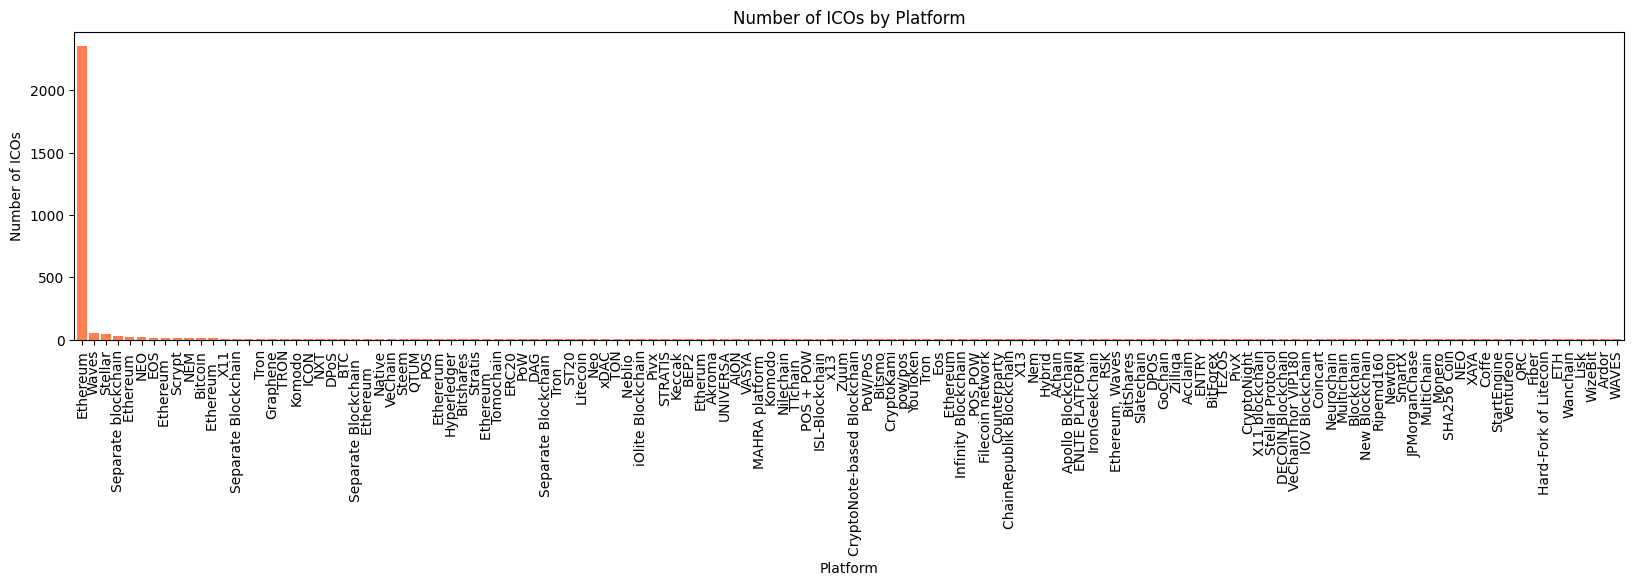

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Count ICOs per platform
ico_counts = df['platform'].value_counts()

# Plotting the results
plt.figure(figsize=(20,4))
ico_counts.plot(kind='bar', color='coral',width=0.8)
plt.title('Number of ICOs by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of ICOs')
plt.xticks()  # Rotate labels to improve readability
plt.grid(False)
plt.show()


In [39]:


# Correctly parse 'startDate' and 'endDate' assuming DD/MM/YYYY format
df['startDate'] = pd.to_datetime(df['startDate'], format='%d/%m/%Y', errors='coerce')
df['endDate'] = pd.to_datetime(df['endDate'], format='%d/%m/%Y', errors='coerce')

# Calculate the duration in days
df['durationDays'] = (df['endDate'] - df['startDate']).dt.days

# Check for any negative durations and correct them
df['durationDays'] = df['durationDays'].apply(lambda x: abs(x) if x < 0 else x)

# Verify the transformations and check the first few rows
print(df[['startDate', 'endDate', 'durationDays']].head())

df.to_csv('data_with_region.csv', index=True)


   startDate    endDate  durationDays
0 2019-01-10 2019-01-10             0
1 2018-07-09 2018-12-10           154
2 2019-01-07 2020-06-30           540
3 2019-01-10 2019-12-15           339
4 2019-07-28 2019-11-30           125


In [40]:


# Then proceed with your existing code
missing_perc = df.isna().mean() * 100
columns_with_missing = missing_perc[missing_perc > 0]
table = pd.DataFrame(columns=["Column Name", "Missing Percentage"])
table["Column Name"] = columns_with_missing.index
table["Missing Percentage"] = columns_with_missing.values.round(2)
print(table)

     Column Name  Missing Percentage
0       priceUSD                6.51
1  countryRegion                2.57
2       teamSize                5.57


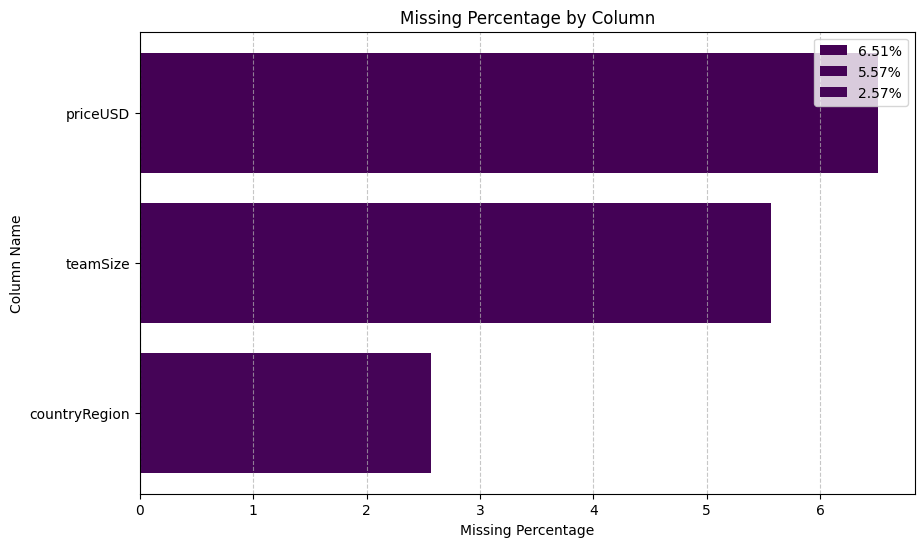

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `table` DataFrame is already defined
# Assuming 'table' DataFrame contains 'Column Name' and 'Missing Percentage' columns

# Sort the DataFrame by missing percentage in descending order
table = table.sort_values(by="Missing Percentage", ascending=False)

# Define the 'viridis' palette
colors = plt.cm.viridis(range(len(table)))

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(table["Column Name"], table["Missing Percentage"], color=colors)
plt.xlabel('Missing Percentage')
plt.ylabel('Column Name')
plt.title('Missing Percentage by Column')
plt.gca().invert_yaxis()  # Invert y-axis to display highest missing percentage at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add legend indicating the percentage for each color
legend_labels = [f'{perc:.2f}%' for perc in table["Missing Percentage"]]
plt.legend(bars, legend_labels, loc='upper right')

plt.show()


In [42]:
num_missing = df.isnull().any(axis=1).sum()
pct_missing = (num_missing / len(df)) * 100
print("Missing values in %:", pct_missing.round(2))
percentage = (df[df['priceUSD'] == 0]['priceUSD'].count() / len(df)) * 100
print(f"Percentage of priceUSD values that are 0 : {percentage:.2f}%")
duplicate_percentage = (len(df[df.duplicated()]) / len(df)) * 100
print(f"Duplicate percentage: {duplicate_percentage}%")
for col in categorical_vars:
    empty_count = df[df[col] == ' '].shape[0]
    total_count = df.shape[0]
    percentage = np.round(np.divide(empty_count, total_count) * 100.0, 2)
    print(f"Percentage of empty strings in {col}: {percentage}%")

Missing values in %: 13.55
Percentage of priceUSD values that are 0 : 5.49%
Duplicate percentage: 0.0%
Percentage of empty strings in success: 0.0%
Percentage of empty strings in brandSlogan: 0.0%
Percentage of empty strings in countryRegion: 0.0%
Percentage of empty strings in startDate: 0.0%
Percentage of empty strings in endDate: 0.0%
Percentage of empty strings in platform: 0.22%


In [43]:
unique_chars = df['countryRegion'].unique()
print((sorted([char for char in unique_chars if pd.notnull(char)])))

['Afghanistan', 'Andorra', 'Anguilla', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bosnia and Herzegovina', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'French Polynesia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guinea-Bissau', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malaysia', 'Malta', 'Marshall Islands', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nigeria', 'Northern Mariana Islands', 'Norway', 'Pakistan', 'Panam

In [44]:
import pandas as pd
import pycountry_convert as pc

def get_continent(country_name):
    try:
        if country_name == 'United Kingdom' or country_name == 'UK':
            return 'Europe'
        elif country_name == 'Timor-Leste':
            return 'Asia'
        elif country_name == 'Curacao':
            return 'South America'
        country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_mapping = {
            'AF': 'Africa',
            'NA': 'North America',
            'OC': 'Oceania',
            'AN': 'Antarctica',
            'AS': 'Asia',
            'EU': 'Europe',
            'SA': 'South America'
        }
        return continent_mapping.get(continent_name, 'Other')
    except:
        return 'Other'

# Assuming `data` is your DataFrame with the 'countryRegion' column
# Apply the get_continent function to create a new 'region' column
df['region'] = df['countryRegion'].apply(get_continent)

# Check the updated DataFrame
print(df[['countryRegion', 'region']].head())


# Export the DataFrame with the new column to a CSV file
df.to_csv('data_with_region.csv', index=True)


  countryRegion  region
0     Singapore    Asia
1         Malta  Europe
2            UK  Europe
3   Netherlands  Europe
4     Mauritius  Africa


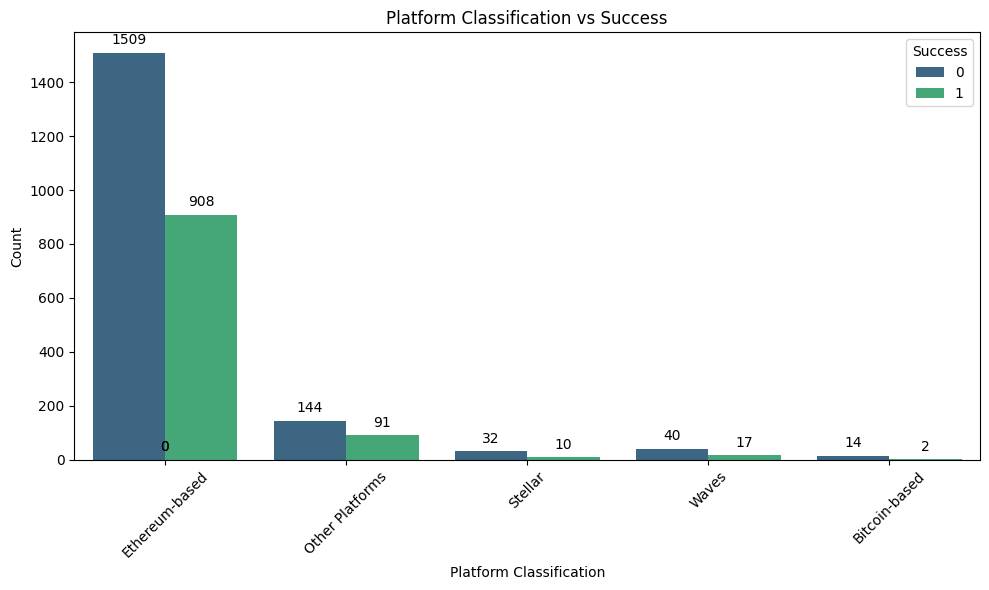

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def classify_platform_specific(platform):
    # Define lists for classification
    ethereum_based = ['Ethereum', 'ETH', 'ERC20', 'Etherum', 'Ethereum', 'Ethererum', 'Ethereum ', 'Ethereum  ', 'Ethereum   ']
    bitcoin_based = ['Bitcoin', 'BTC', 'SHA256 Coin', 'Hard-Fork of Litecoin', 'Bitcoin Cash']
    waves = ['Waves']
    stellar = ['Stellar', 'Stellar Protocol']
    # Classify platforms
    if any(platform.strip().lower() in p.lower() for p in ethereum_based):
        return 'Ethereum-based'
    elif any(platform.strip().lower() in p.lower() for p in bitcoin_based):
        return 'Bitcoin-based'
    elif any(platform.strip().lower() in p.lower() for p in waves):
        return 'Waves'
    elif any(platform.strip().lower() in p.lower() for p in stellar):
        return 'Stellar'
    else:
        return 'Other Platforms'

# Apply classification to the 'platform' column
df['platform_classification'] = df['platform'].apply(classify_platform_specific)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='platform_classification', hue='success', palette='viridis')
plt.title('Platform Classification vs Success')
plt.xlabel('Platform Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Success', loc='upper right')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

df.to_csv('data_with_region.csv', index=True)


In [46]:
unique_chars = df['platform'].unique()
print((sorted([char for char in unique_chars if pd.notnull(char)])))

[' ', ' Ethereum', ' NEO', 'AION', 'Acclaim', 'Achain', 'Akroma', 'Apollo Blockchain', 'Ardor', 'BEP2', 'BTC', 'BitForex', 'BitShares', 'Bitcoin', 'Bitshares', 'Bitsmo', 'Blockchain', 'ChainRepublik Blockchain', 'Coffe', 'Coincart', 'Counterparty', 'CryptoKami', 'CryptoNight', 'CryptoNote-based Blockchain', 'DAG', 'DECOIN Blockchain', 'DPOS', 'DPoS', 'ENLTE PLATFORM', 'ENTRY', 'EOS', 'ERC20', 'ETH', 'Eos', 'Ethererum', 'Ethereum', 'Ethereum ', 'Ethereum  ', 'Ethereum   ', 'Ethereum    ', 'Ethereum     ', 'Ethereum, Waves', 'Etherum', 'Fiber', 'Filecoin network', 'GoChain', 'Graphene', 'Hard-Fork of Litecoin', 'Hybrid', 'Hyperledger', 'ICON', 'IOV Blockchain', 'ISL-Blockchain', 'Infinity Blockchain', 'IronGeekChain', 'JPMorganChase', 'Keccak', 'Komodo', 'Lisk', 'Litecoin', 'MAHRA platform ', 'Monero', 'MultiChain', 'Multichain', 'NEM', 'NEO', 'NXT', 'Native', 'Neblio ', 'Nem', 'Neo', 'Neurochain', 'New Blockchain', 'Newton', 'Nilechain', 'POS', 'POS + POW', 'POS,POW', 'PivX', 'Pivx', 'P

In [47]:
label_encoder = LabelEncoder()
df['success_encoded'] = label_encoder.fit_transform(df['success'])
df.to_csv('data_with_region.csv', index=True)

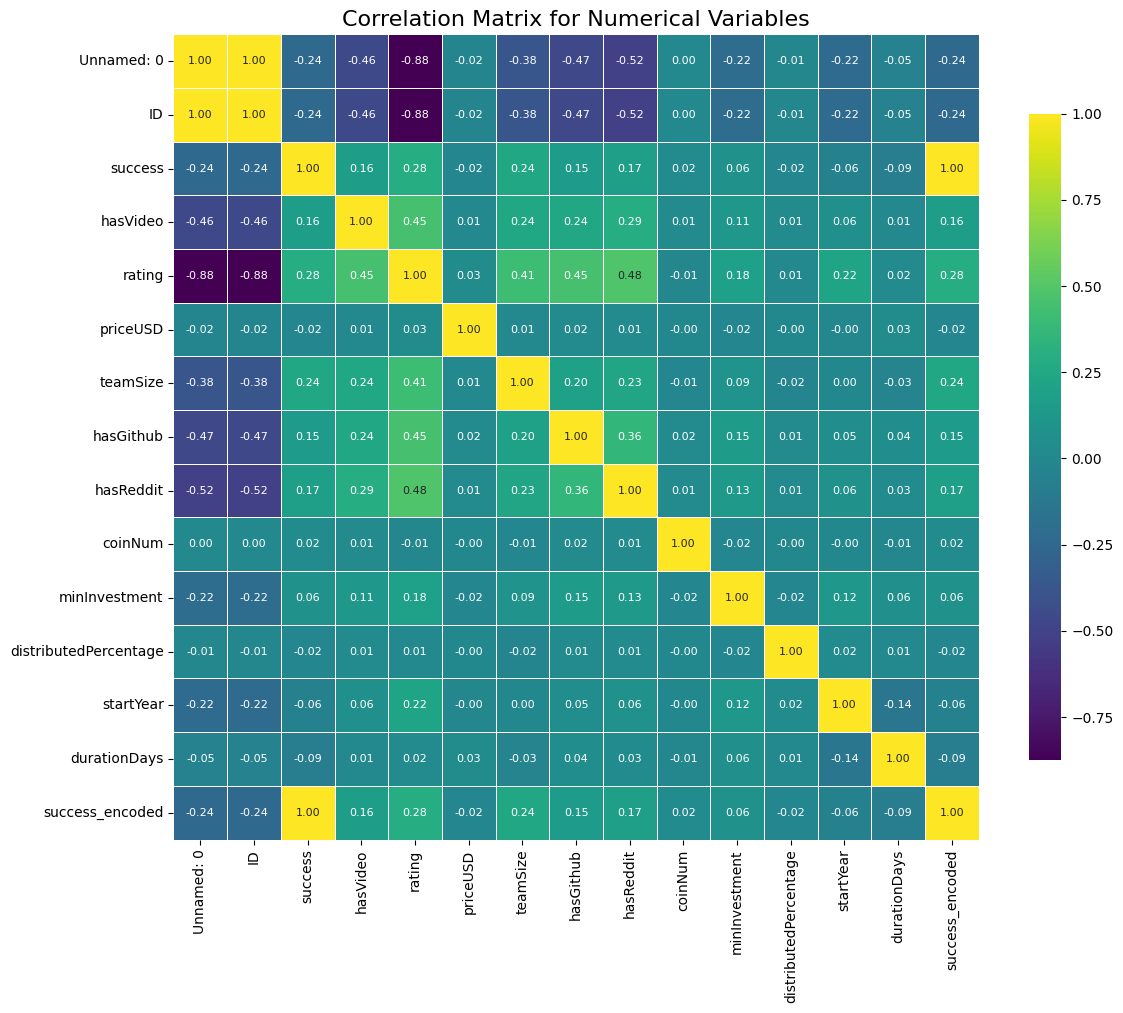

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data_with_region.csv')

# Select numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix_numerical = numerical_data.corr()

# Set figure size
plt.figure(figsize=(12, 10))

# Create a heatmap with a different color scheme ('viridis')
sns.heatmap(correlation_matrix_numerical, 
            annot=True, 
            fmt=".2f", 
            cmap='viridis',  # Change the colormap here
            square=True,  
            linewidths=0.5,  
            cbar_kws={"shrink": 0.8},  
            annot_kws={"size": 8})  

# Add title and adjust font size
plt.title('Correlation Matrix for Numerical Variables', fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


Data Visualisation


In [49]:
def plot_histogram_boxplot(df, col, bins=10, show_outliers=True, figsize=(10, 5), save_fig=False,
                           hist_color='skyblue', boxplot_color='lightgreen', hist_label='Histogram', boxplot_label='Box plot'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=figsize)

    ax1.hist(df[col], bins=bins, edgecolor='black', alpha=0.7, color=hist_color, label=hist_label)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram')
    ax1.legend()

    if not show_outliers:
        sns.boxplot(df[col], showfliers=False, ax=ax2, color=boxplot_color)
    else:
        sns.boxplot(df[col], ax=ax2, color=boxplot_color)
    ax2.set_title('Box plot')
    ax2.set_xlabel(col)

    # Create a legend for the boxplot
    handles, _ = ax2.get_legend_handles_labels()
    ax2.legend(handles, [boxplot_label], loc='best')

    plt.tight_layout()

    if save_fig:
        plt.savefig(col + '_hist_box.png', format='png')
    
    plt.show()


In [50]:
#for i, col in enumerate(original_numerical_values):
    #plot_histogram_boxplot(df, col)

In [51]:
import pandas as pd



# Function to detect outliers using the IQR method
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR)))
    return series[outlier_condition]

# Analyzing outliers for each numerical column
outliers = {}
for col in df.select_dtypes(include=['float64', 'int64']):
    outliers_found = detect_outliers(df[col])
    outliers[col] = {
        'number_of_outliers': outliers_found.count(),
        'outliers': outliers_found
    }

# Print the number of outliers in each column and some examples
for col, details in outliers.items():
    print(f"{col} - Number of outliers: {details['number_of_outliers']}")
    if details['number_of_outliers'] > 0:
        print(f"Examples of outliers: {details['outliers'].sample(min(5, details['number_of_outliers']))}\n")



ID - Number of outliers: 0
success - Number of outliers: 0
hasVideo - Number of outliers: 0
rating - Number of outliers: 0
priceUSD - Number of outliers: 240
Examples of outliers: 1285    2.56
2028    7.00
2008    1.33
2485    4.52
1688    1.23
Name: priceUSD, dtype: float64

teamSize - Number of outliers: 66
Examples of outliers: 332     37.0
1066    38.0
914     35.0
735     37.0
1701    50.0
Name: teamSize, dtype: float64

hasGithub - Number of outliers: 0
hasReddit - Number of outliers: 0
coinNum - Number of outliers: 395
Examples of outliers: 275     7.200000e+09
2043    7.000000e+09
2516    3.000000e+09
1768    3.500000e+10
2192    1.700000e+09
Name: coinNum, dtype: float64

minInvestment - Number of outliers: 0
distributedPercentage - Number of outliers: 10
Examples of outliers: 946      62.50
680       9.52
98        1.66
1407    100.00
1987     60.00
Name: distributedPercentage, dtype: float64

durationDays - Number of outliers: 57
Examples of outliers: 879     443
1362    530

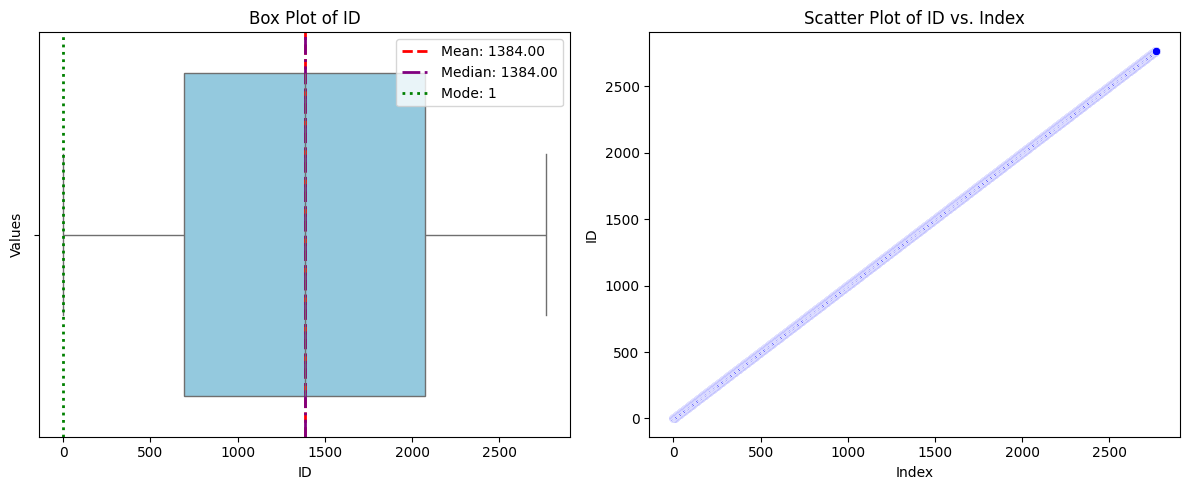

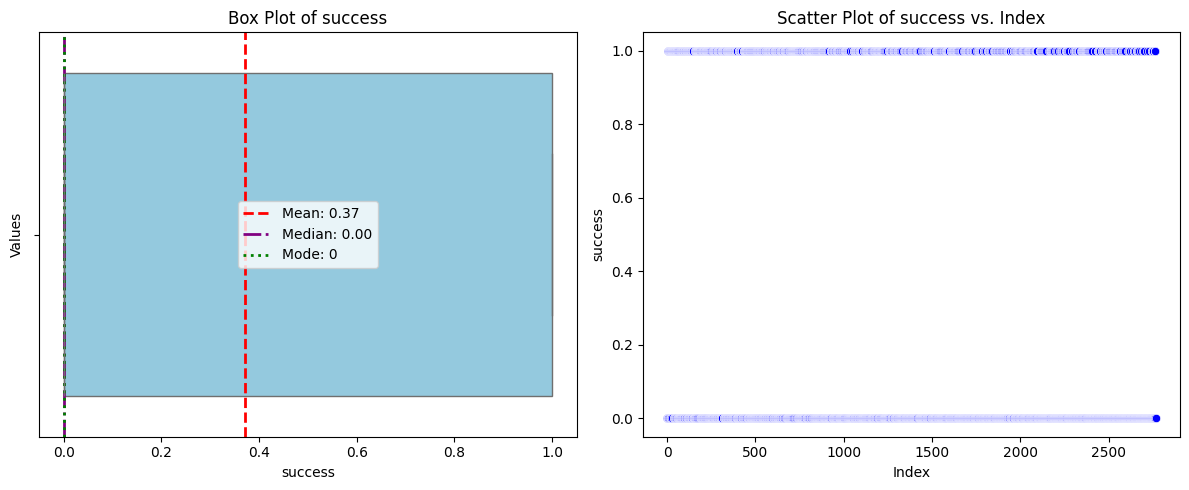

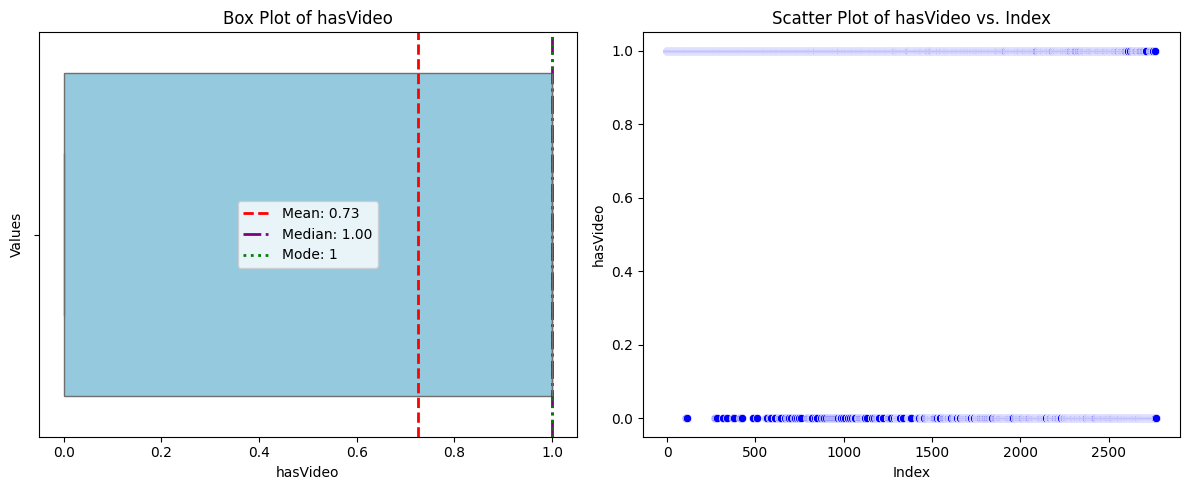

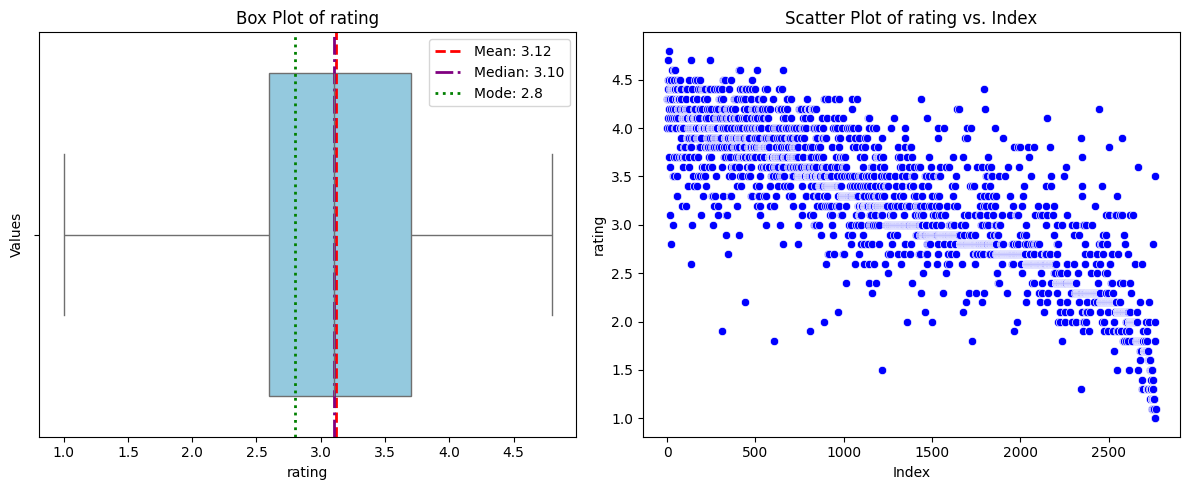

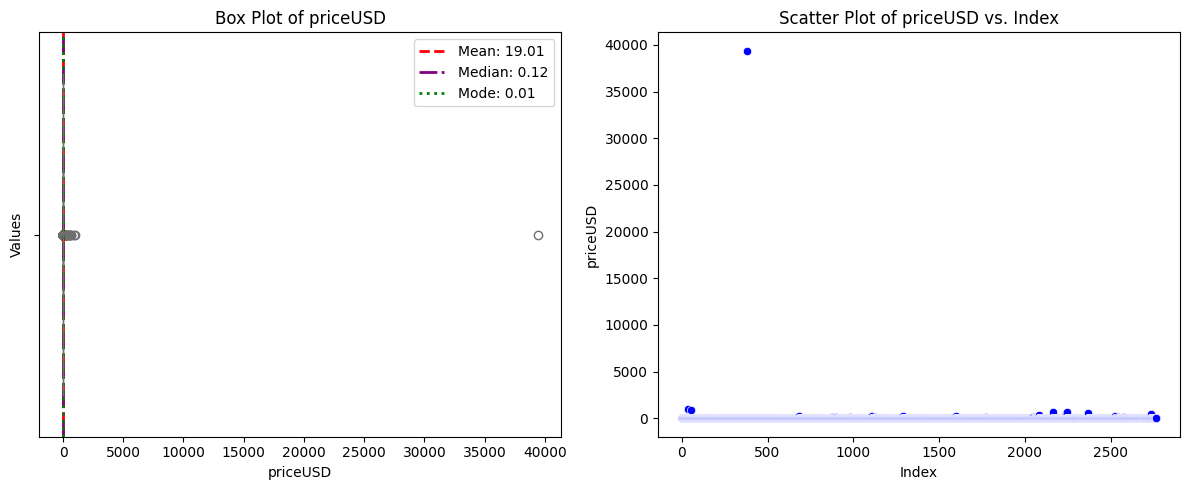

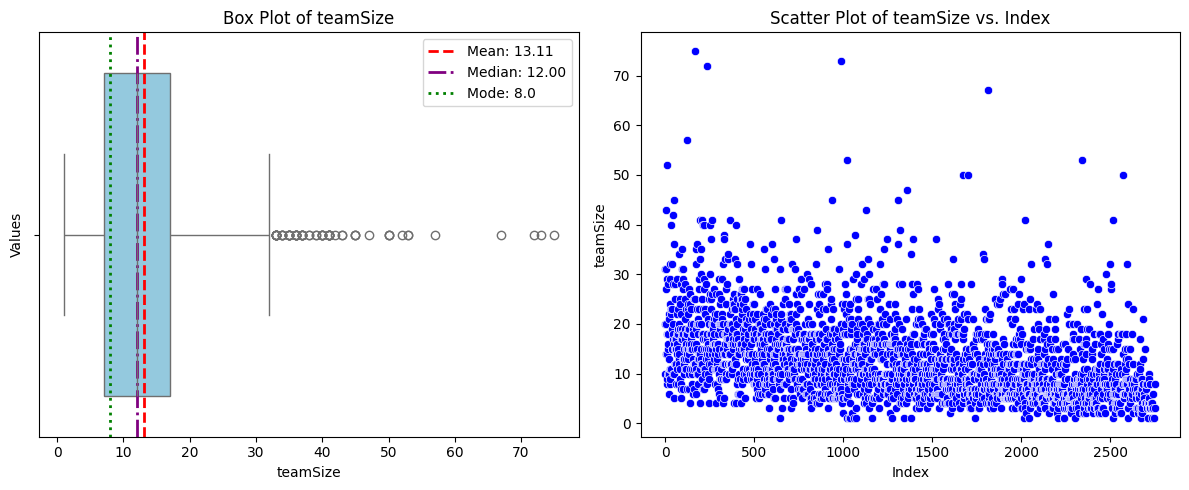

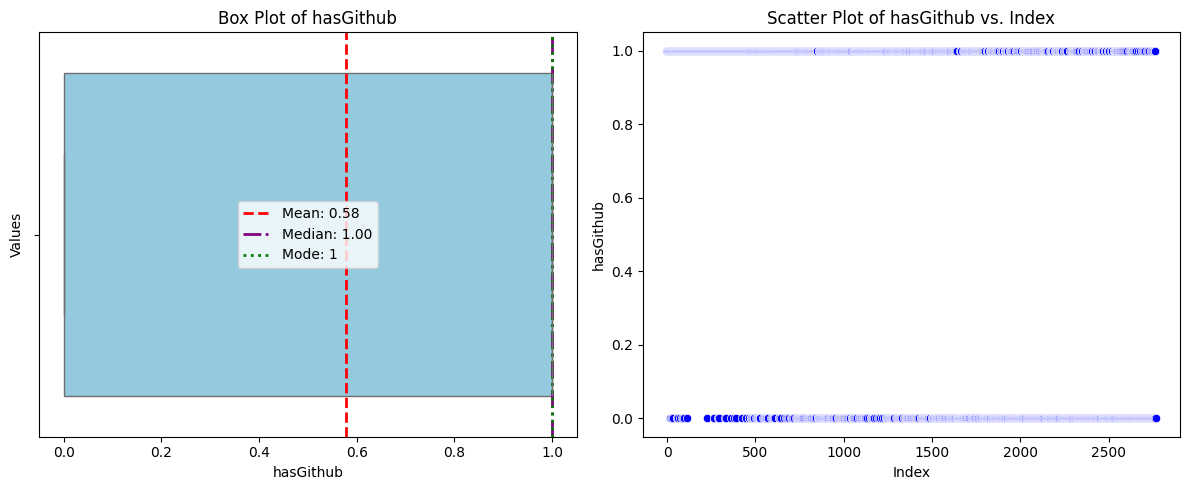

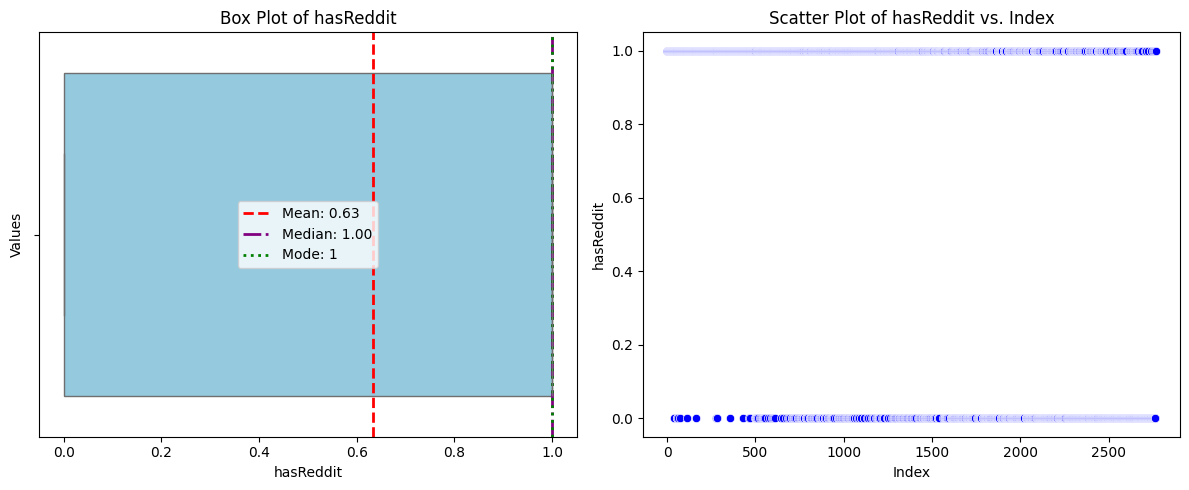

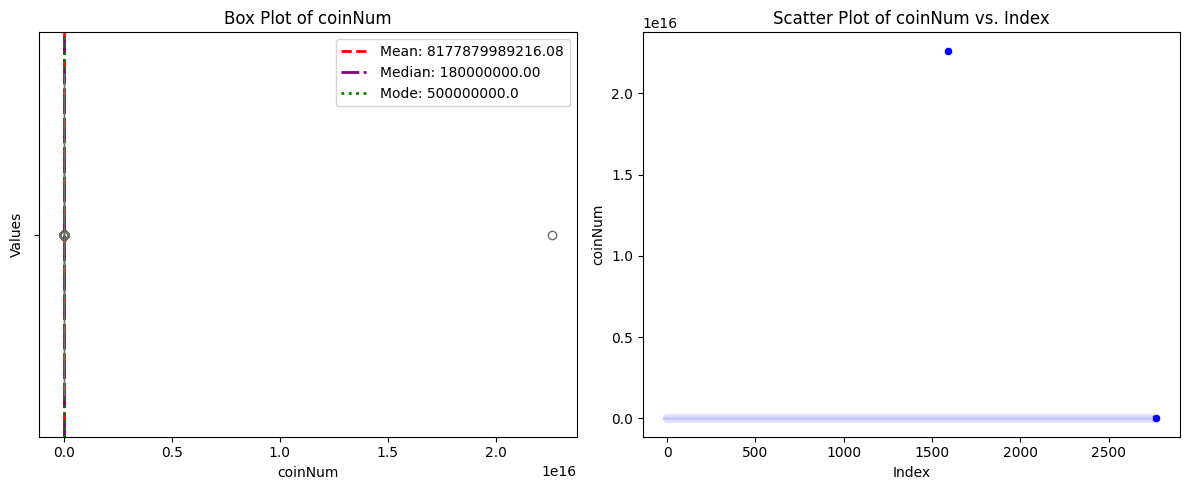

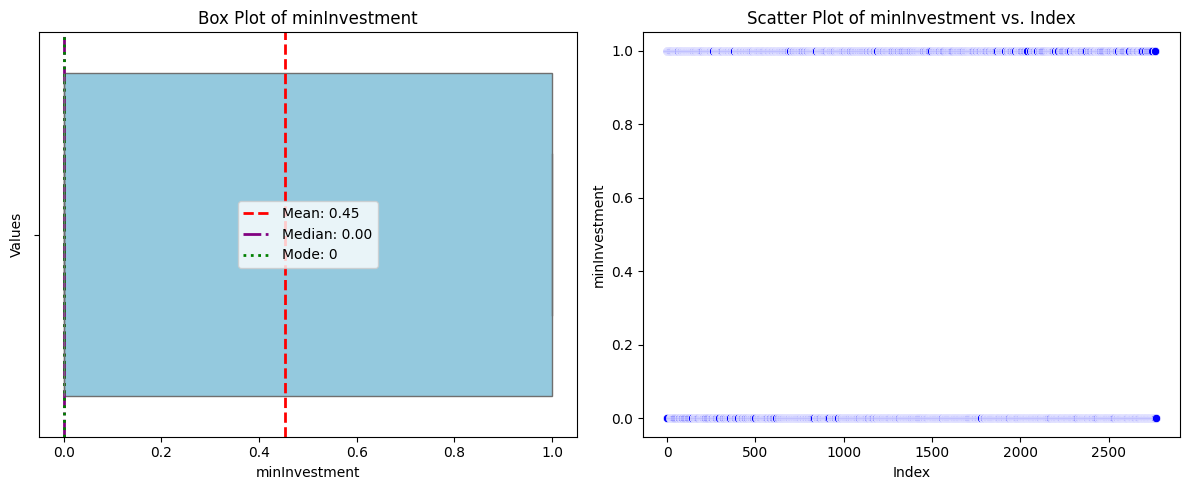

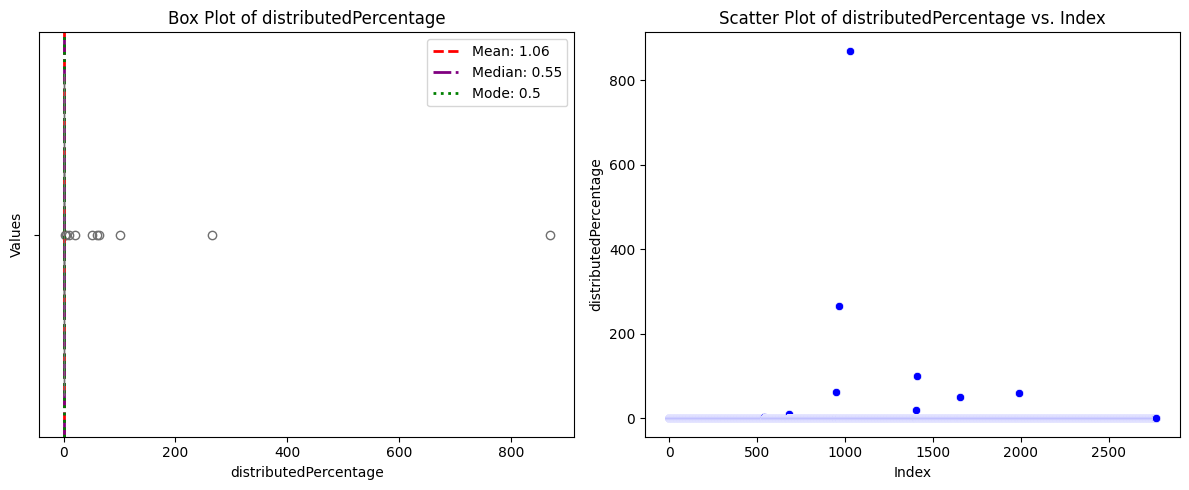

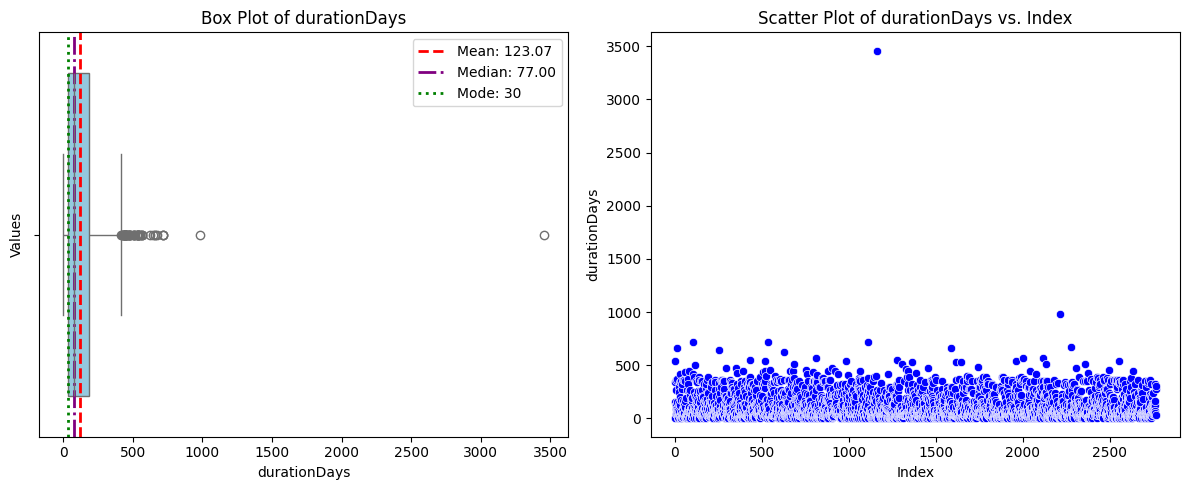

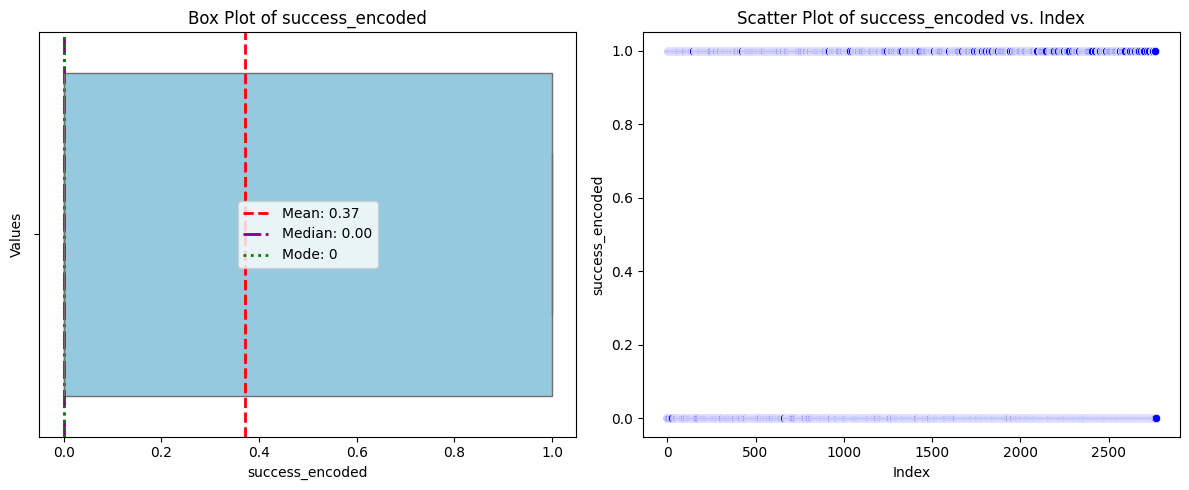

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and defined elsewhere in your code
# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')  # Uncomment and set path if needed

# Define numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical variable to create separate figures for each
for col in numerical_columns:
    # Set up a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize appropriately

    # Calculate mean, median, and mode using pandas
    mean_value = df[col].mean()
    median_value = df[col].median()
    mode_values = df[col].mode()
    mode_value = mode_values.iloc[0] if not mode_values.empty else 'No mode'

    # Box plot on the first subplot
    sns.boxplot(x=df[col], ax=axs[0], color='skyblue')
    axs[0].set_title(f'Box Plot of {col}')
    axs[0].set_xlabel(f'{col}')
    axs[0].set_ylabel('Values')
    # Add mean, median, and mode lines with annotations in the legend
    mean_line = axs[0].axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    median_line = axs[0].axvline(median_value, color='purple', linestyle='dashdot', linewidth=2, label=f'Median: {median_value:.2f}')
    mode_line = axs[0].axvline(mode_value, color='g', linestyle='dotted', linewidth=2, label=f'Mode: {mode_value}')
    axs[0].legend()

    # Scatter plot on the second subplot
    sns.scatterplot(x=df.index, y=df[col], ax=axs[1], color='blue')
    axs[1].set_title(f'Scatter Plot of {col} vs. Index')
    axs[1].set_xlabel('Index')
    axs[1].set_ylabel(f'{col}')

    # Adjust layout to fit plots neatly
    plt.tight_layout()
    plt.show()


Data Preparation 

Handling Missing data
and outliers


In [53]:
outlier_columns = ['priceUSD', 'teamSize', 'distributedPercentage', 'coinNum']

for column in outlier_columns:
    q1 = df[column].quantile(0.05)
    q3 = df[column].quantile(0.95)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [54]:
df.shape

(2312, 21)

In [55]:
df['priceUSD'].fillna(df['priceUSD'].median(), inplace=True)
df['teamSize'].fillna(df['teamSize'].median(), inplace=True)

C:\Users\ajaia\AppData\Local\Temp\ipykernel_5368\3702656010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['priceUSD'].fillna(df['priceUSD'].median(), inplace=True)
C:\Users\ajaia\AppData\Local\Temp\ipykernel_5368\3702656010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [56]:
df['priceUSD'] = np.where(df['priceUSD'] == 0, df['priceUSD'].median(), df['priceUSD'])

Feature Engineering

In [57]:
label_encoder = LabelEncoder()
df['success_encoded'] = label_encoder.fit_transform(df['success'])

In [58]:
'''value_counts = df['countryRegion'].str.lower().replace(['curacao', 'curaçao'], 'curacao').value_counts()
percentage = value_counts / len(df) * 100
total_percentage = percentage.head(10).sum()
print("Total percentage for top 10 unique values: %.2f%%" % total_percentage)'''

'value_counts = df[\'countryRegion\'].str.lower().replace([\'curacao\', \'curaçao\'], \'curacao\').value_counts()\npercentage = value_counts / len(df) * 100\ntotal_percentage = percentage.head(10).sum()\nprint("Total percentage for top 10 unique values: %.2f%%" % total_percentage)'

In [59]:
'''df['countryRegion'] = df['countryRegion'].str.lower().replace(['curacao', 'curaçao'], 'curacao')
top_10_countries = df['countryRegion'].value_counts().head(10).index.tolist()

filtered_df = df[df['countryRegion'].isin(top_10_countries)]
df = pd.concat([df, pd.get_dummies(filtered_df['countryRegion'])], axis=1)

countries_to_fill = ['cayman islands', 'estonia','germany', 'malta', 'netherlands', 'russia', 'singapore', 'switzerland','uk', 'usa',]
df[countries_to_fill] = df[countries_to_fill].fillna(0)'''

"df['countryRegion'] = df['countryRegion'].str.lower().replace(['curacao', 'curaçao'], 'curacao')\ntop_10_countries = df['countryRegion'].value_counts().head(10).index.tolist()\n\nfiltered_df = df[df['countryRegion'].isin(top_10_countries)]\ndf = pd.concat([df, pd.get_dummies(filtered_df['countryRegion'])], axis=1)\n\ncountries_to_fill = ['cayman islands', 'estonia','germany', 'malta', 'netherlands', 'russia', 'singapore', 'switzerland','uk', 'usa',]\ndf[countries_to_fill] = df[countries_to_fill].fillna(0)"

In [60]:
'''df['duration'] = np.abs((pd.to_datetime(df['endDate']) - pd.to_datetime(df['startDate'])).dt.days)'''

"df['duration'] = np.abs((pd.to_datetime(df['endDate']) - pd.to_datetime(df['startDate'])).dt.days)"

In [61]:
values_to_check = ['ETH', 'Ethererum', 'Ethereum', 'Ethereum, Waves', 'Etherum','Ethereum-based']
value_counts = df['platform_classification'].str.strip().value_counts()
filtered_counts = value_counts[value_counts.index.isin(values_to_check)]
percentages = (filtered_counts / value_counts.sum()) * 100
print("Total percentage for Ethererum platform : %.2f%%" % percentages.sum())

Total percentage for Ethererum platform : 88.15%


In [62]:
values_to_check = ['ETH', 'Ethererum', 'Ethereum', 'Ethereum, Waves', 'Etherum','Ethereum-based']
df['platform_Ethereum'] = np.where(df['platform_classification'].isin(values_to_check), 1, 0)

In [63]:
df['brandSlogan_score'] = df['brandSlogan'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [64]:


# Inspect the specific columns we are interested in
print(df[['region']].head())

# Check for missing values in these columns
print(df[['region']].isnull().sum())


   region
1  Europe
2  Europe
4  Africa
5  Europe
6    Asia
region    0
dtype: int64


In [65]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Define columns to normalize
columns_to_normalize = ['rating', 'priceUSD', 'teamSize', 'distributedPercentage', 'durationDays', 'coinNum']

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Save the normalized DataFrame if needed
df.to_csv('path_to_normalized_file.csv', index=False)

# Display the first few rows to check the normalization
print(df[columns_to_normalize].head())


     rating  priceUSD  teamSize  distributedPercentage  durationDays   coinNum
1  0.885714  0.017118  0.339286               0.246988      0.044534  0.015000
2  0.914286  0.000000  0.160714               0.240964      0.156160  0.333333
4  0.885714  0.002853  0.232143               0.301205      0.036148  0.333333
5  1.000000  0.012839  0.750000               0.301205      0.036437  0.033333
6  0.828571  0.001427  0.339286               0.150602      0.026027  0.166667


In [66]:
# One-hot encoding the 'region' column
df = pd.get_dummies(df, columns=['region'], prefix='region')

# Convert boolean columns to integers (0 and 1)
boolean_columns = df.filter(like='region_').columns
df[boolean_columns] = df[boolean_columns].astype(int)


df.to_csv('data_with_region.csv', index=False)

df.head()

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,...,success_encoded,platform_Ethereum,brandSlogan_score,region_Africa,region_Asia,region_Europe,region_North America,region_Oceania,region_Other,region_South America
1,2,0,The Ultimate Blockchain Gaming Platform,1,0.885714,0.017118,Malta,2018-07-09,2018-12-10,0.339286,...,0,0,0.000,0,0,1,0,0,0,0
2,3,0,Simple Automated Investment App Driven by AI & ML,1,0.914286,0.000000,UK,2019-01-07,2020-06-30,0.160714,...,0,0,0.000,0,0,1,0,0,0,0
4,5,0,"Secure, Interference-Free Communications System",1,0.885714,0.002853,Mauritius,2019-07-28,2019-11-30,0.232143,...,0,1,0.400,1,0,0,0,0,0,0
5,6,0,Blockchain-based Bank Full Eco System WorldWide,1,1.000000,0.012839,UK,2020-02-25,2020-06-30,0.750000,...,0,1,0.350,0,0,1,0,0,0,0
6,7,1,The First Blockchain Based Platform in Global,1,0.828571,0.001427,Singapore,2018-08-06,2018-05-08,0.339286,...,1,1,0.125,0,1,0,0,0,0,0


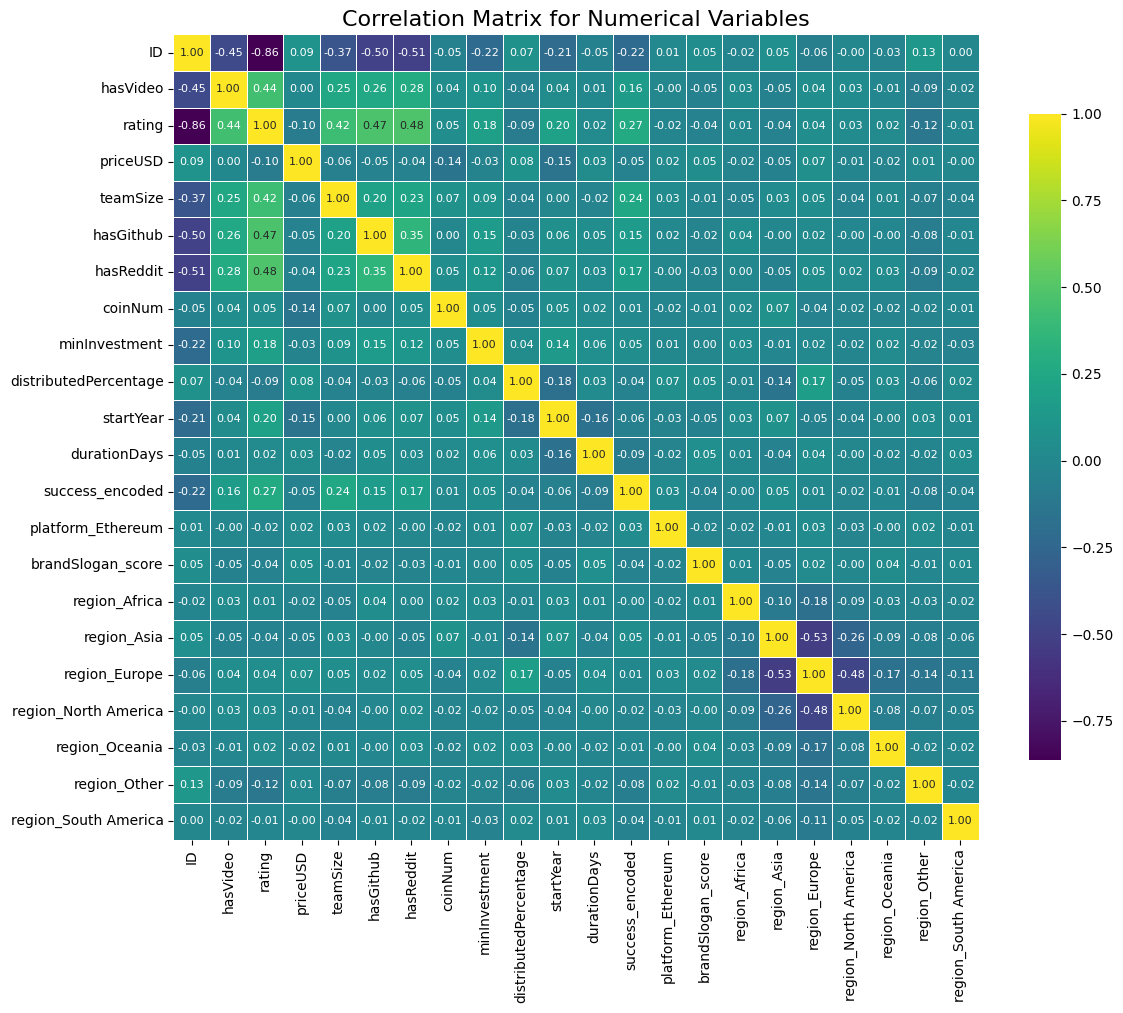

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data_with_region.csv')

# Select numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix_numerical = numerical_data.corr()

# Set figure size
plt.figure(figsize=(12, 10))

# Create a heatmap with a different color scheme ('viridis')
sns.heatmap(correlation_matrix_numerical, 
            annot=True, 
            fmt=".2f", 
            cmap='viridis',  # Change the colormap here
            square=True,  
            linewidths=0.5,  
            cbar_kws={"shrink": 0.8},  
            annot_kws={"size": 8})  

# Add title and adjust font size
plt.title('Correlation Matrix for Numerical Variables', fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


Feature Selection

In [68]:
X = df.drop(['success','success_encoded','brandSlogan','platform','startDate','endDate','ID','countryRegion','platform_classification'], axis=1)
y = df['success_encoded']
X.shape
print(X)

      hasVideo    rating  priceUSD  teamSize  hasGithub  hasReddit   coinNum  \
1            1  0.885714  0.017118  0.339286          1          1  0.015000   
2            1  0.914286  0.000000  0.160714          1          1  0.333333   
4            1  0.885714  0.002853  0.232143          1          1  0.333333   
5            1  1.000000  0.012839  0.750000          1          1  0.033333   
6            1  0.828571  0.001427  0.339286          1          1  0.166667   
...        ...       ...       ...       ...        ...        ...       ...   
2736         0  0.000000  0.019971  0.035714          0          0  0.026667   
2737         0  0.028571  0.005706  0.000000          0          0  0.046667   
2738         0  0.028571  0.141227  0.053571          0          0  0.002333   
2742         0  0.028571  0.004280  0.089286          1          1  0.001333   
2746         0  0.000000  0.141227  0.000000          0          0  0.001333   

      minInvestment  distributedPercent

In [69]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)
feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[feature_indices] if isinstance(X, pd.DataFrame) else None

print(selected_feature_names.values)

['hasVideo' 'rating' 'priceUSD' 'teamSize' 'hasGithub' 'hasReddit'
 'coinNum' 'minInvestment' 'distributedPercentage' 'startYear'
 'durationDays' 'platform_Ethereum' 'brandSlogan_score' 'region_Africa'
 'region_Asia' 'region_Europe' 'region_North America' 'region_Oceania'
 'region_Other' 'region_South America']


Test Train Split

In [70]:
platform_counts = df['success'].value_counts()
print("Frequency of success:")
print(platform_counts)

Frequency of success:
success
0    1403
1     909
Name: count, dtype: int64


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)
len(y_train)

1849

Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
len(X_train)

1849

Modelling

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc

knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


probas0 = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas0[:, 1])
roc_auc = auc(fpr, tpr)


metrics_df = pd.DataFrame({
    'Model': ['K-Nearest Neighbors'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1],
    'AUC' : [roc_auc],
})


In [74]:
from sklearn.model_selection import cross_val_score

# List of candidate k values
k_values = [22,33,41,42,43,44,45,46,47,48,49,50,51,52,59,60]

# Dictionary to store mean cross-validation scores for each k value
cv_scores = {}

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[k] = scores.mean()

# Find the k value with the highest mean cross-validation score
optimal_k = max(cv_scores, key=cv_scores.get)

print("Optimal k value:", optimal_k)


Optimal k value: 47


In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define a range of k values
k_values = [31, 33, 35, 37, 39, 41, 43, 45, 47, 49,51,53,55]

# Dictionary to store accuracies for each k value
accuracy_dict = {}

# Loop over each k value
for k in k_values:
    # Instantiate KNeighborsClassifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it in the dictionary
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[k] = accuracy

# Convert dictionary to DataFrame for easier printing
accuracy_df = pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['Accuracy'])
accuracy_df.index.name = 'k'

print(accuracy_df)
accuracy_df.to_csv('accuracydf.csv', index=False)


    Accuracy
k           
31  0.660907
33  0.654428
35  0.658747
37  0.656587
39  0.658747
41  0.658747
43  0.654428
45  0.667387
47  0.671706
49  0.669546
51  0.665227
53  0.660907
55  0.665227


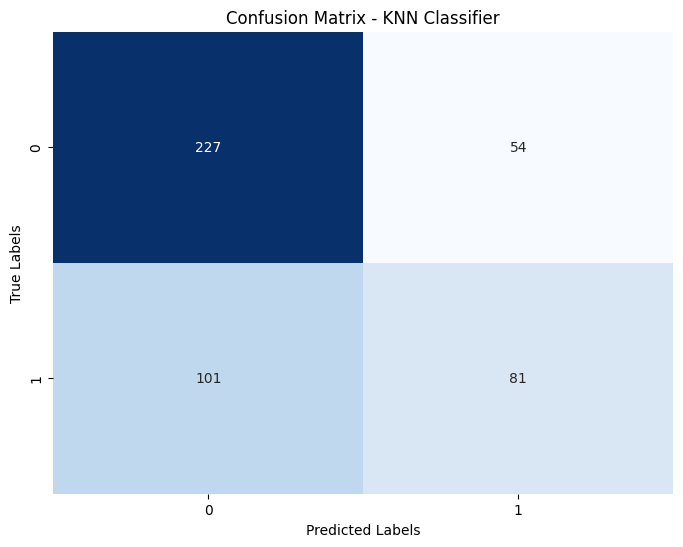

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()


In [77]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)


probas1 = naive_bayes.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas1[:, 1])

metrics_df.loc[1, 'Model'] = 'Naive Bayes'
metrics_df.loc[1, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[1, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[1, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[1, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[1, 'AUC'] = auc(fpr, tpr)

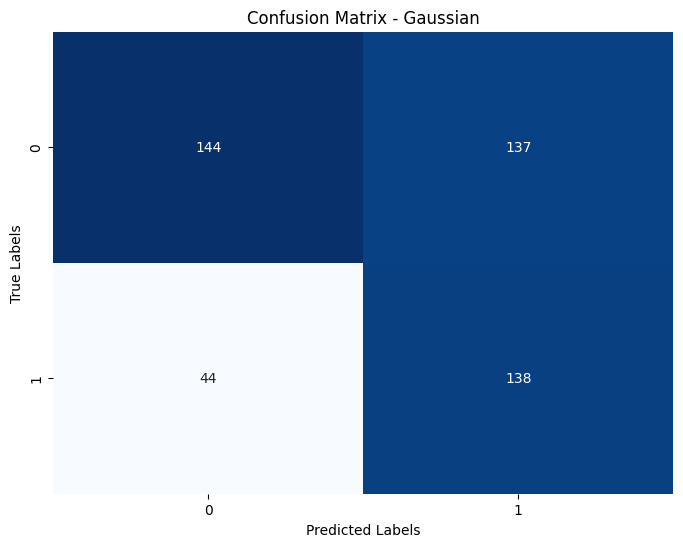

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gaussian')
plt.show()


In [79]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

probas2 = svm.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas2[:, 1])

metrics_df.loc[2, 'Model'] = 'SVM'
metrics_df.loc[2, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[2, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[2, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[2, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[2, 'AUC'] = auc(fpr, tpr)

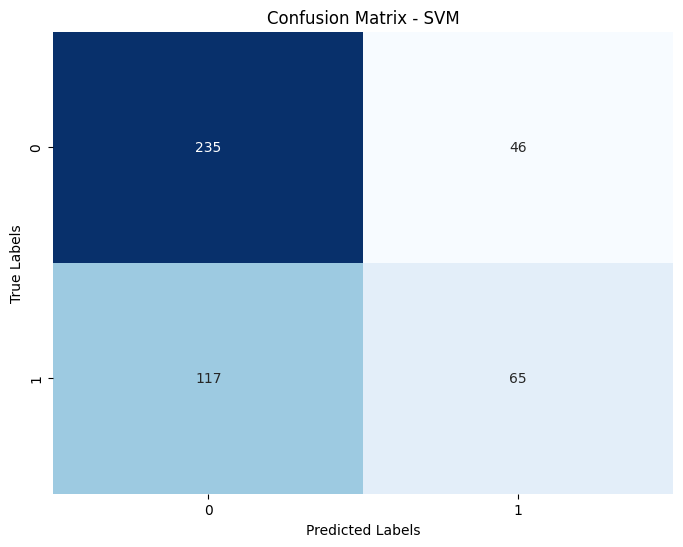

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()


In [81]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

probas3 = random_forest.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas3[:, 1])

metrics_df.loc[3, 'Model'] = 'RandomForest'
metrics_df.loc[3, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[3, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[3, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[3, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[3, 'AUC'] = auc(fpr, tpr)


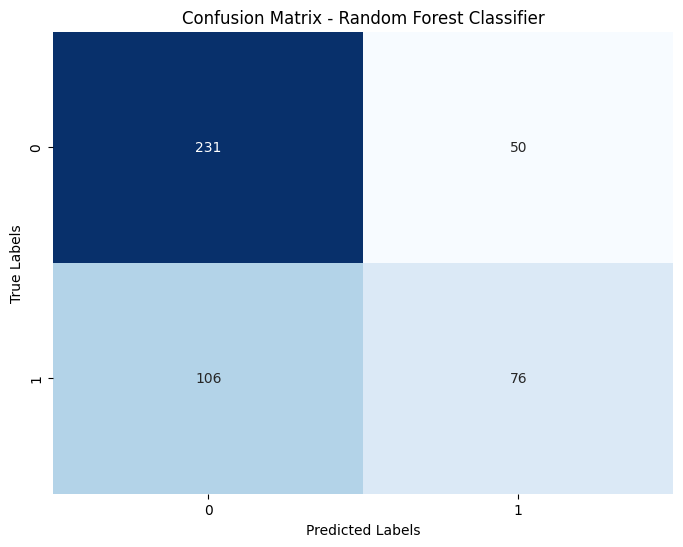

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


In [83]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

probas4 = svm.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas4[:, 1])

metrics_df.loc[4, 'Model'] = 'DecisionTree'
metrics_df.loc[4, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[4, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[4, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[4, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[4, 'AUC'] = auc(fpr, tpr)


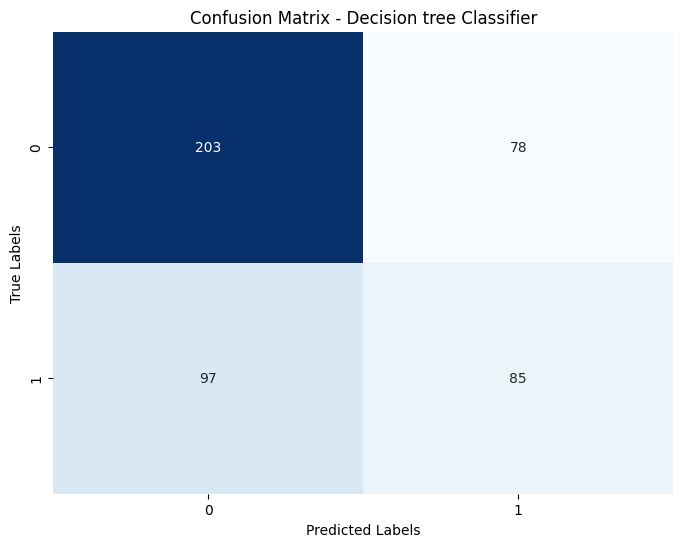

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision tree Classifier')
plt.show()


In [85]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

probas5 = xgb_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas5[:, 1])

metrics_df.loc[5, 'Model'] = 'XGB'
metrics_df.loc[5, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[5, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[5, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[5, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[5, 'AUC'] = auc(fpr, tpr)

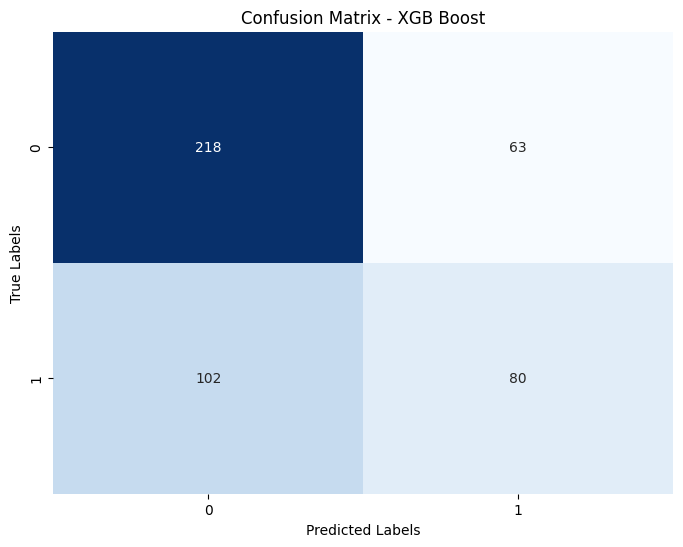

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGB Boost')
plt.show()


In [87]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

probas6 = ada_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas6[:, 1])

metrics_df.loc[6, 'Model'] = 'AdaBoost'
metrics_df.loc[6, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[6, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[6, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[6, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[6, 'AUC'] = auc(fpr, tpr)

c:\Users\ajaia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


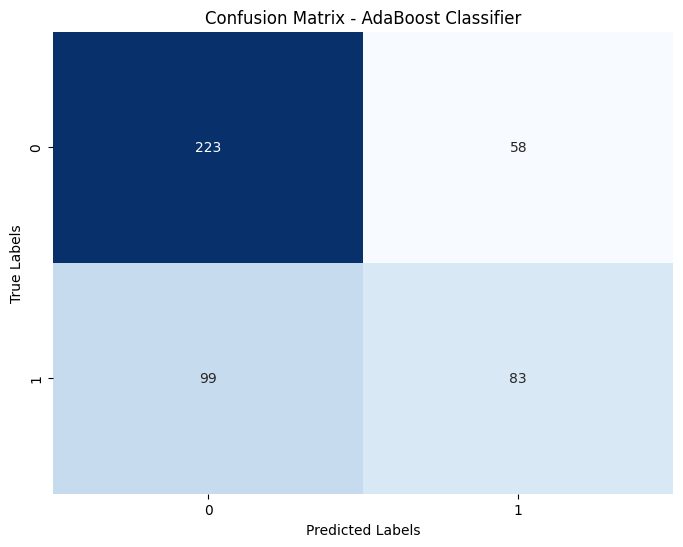

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()


Evaluation

In [89]:
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1-score       AUC
0  K-Nearest Neighbors  0.671706   0.615385  0.439560  0.512821  0.685073
1          Naive Bayes  0.609071   0.501818  0.758242  0.603939  0.683294
2                  SVM  0.647948   0.585586  0.357143  0.443686  0.672989
3         RandomForest  0.663067   0.603175  0.417582  0.493506  0.692914
4         DecisionTree  0.622030   0.521472  0.467033  0.492754  0.672989
5                  XGB  0.643629   0.559441  0.439560  0.492308  0.655801
6             AdaBoost  0.660907   0.588652  0.456044  0.513932  0.695554


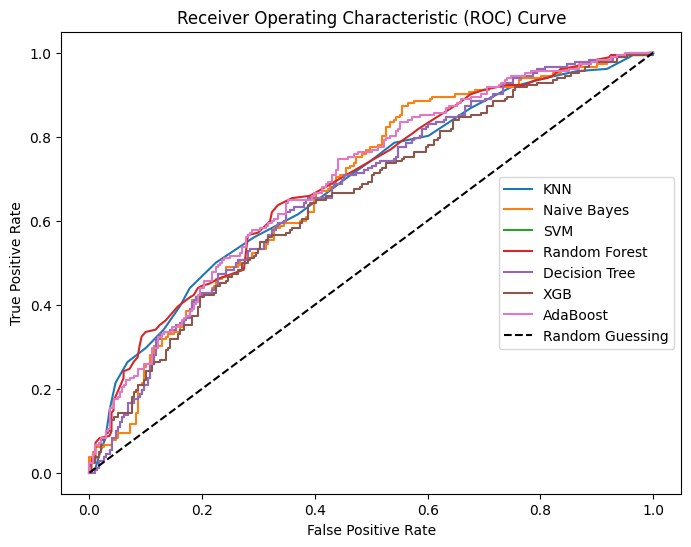

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = ['KNN', 'Naive Bayes', 'SVM', 'Random Forest', 'Decision Tree', 'XGB', 'AdaBoost']
probas = [probas0, probas1, probas2, probas3, probas4, probas5, probas6]

plt.figure(figsize=(8, 6))
 
for i in range(len(models)):
    fpr, tpr, thresholds = roc_curve(y_test, probas[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=models[i])


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='center right')
plt.savefig('ROC.png', format='png')

plt.show()

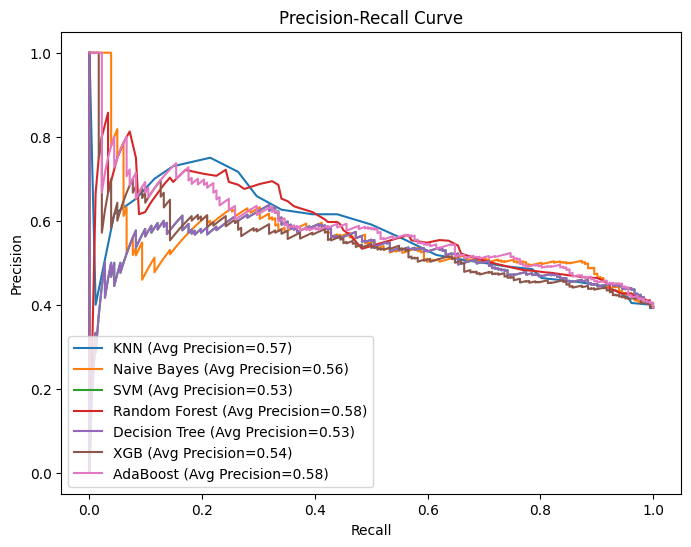

In [91]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))

for i in range(len(models)):
    precision, recall, _ = precision_recall_curve(y_test, probas[i][:, 1])
    avg_precision = average_precision_score(y_test, probas[i][:, 1])
    plt.plot(recall, precision, label=f'{models[i]} (Avg Precision={avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.legend(loc='lower left')
plt.savefig('Precision_Recall.png', format='png')

plt.show()


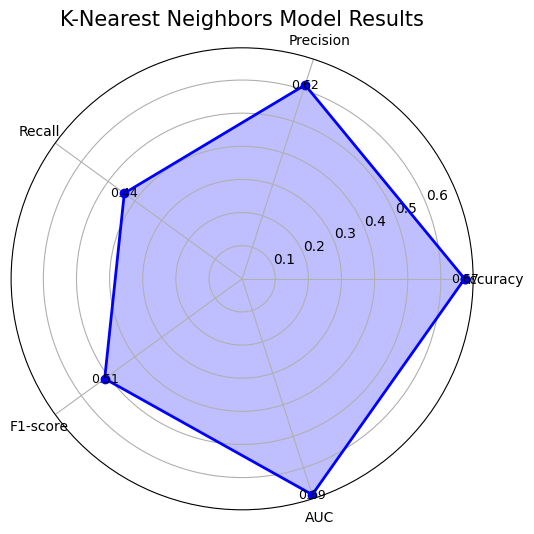

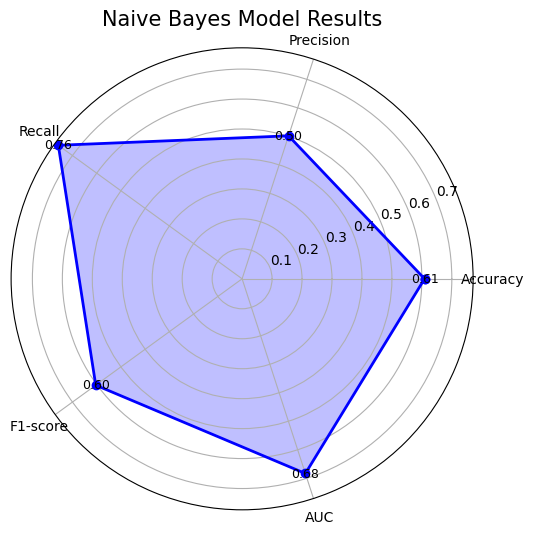

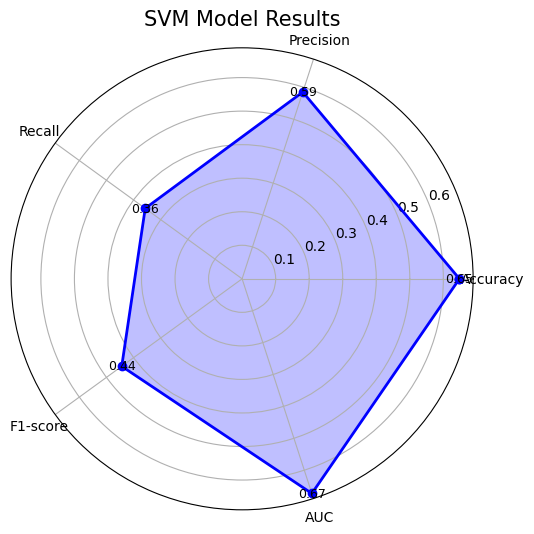

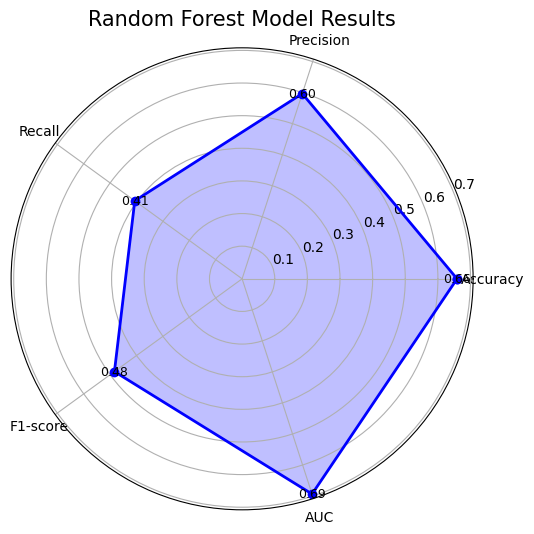

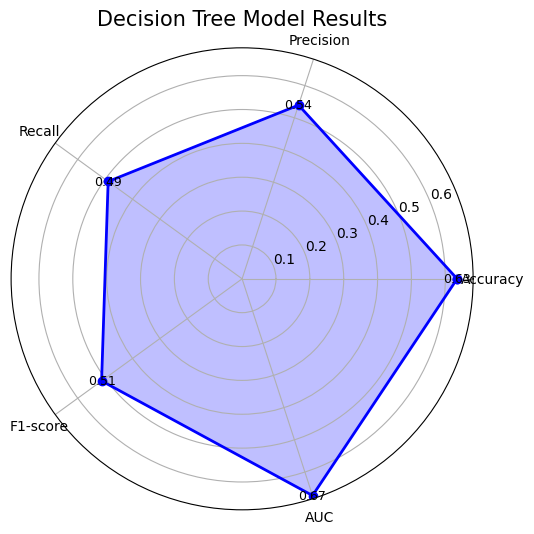

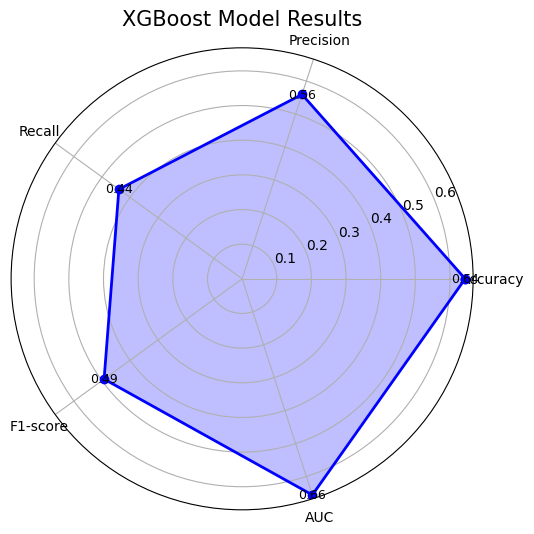

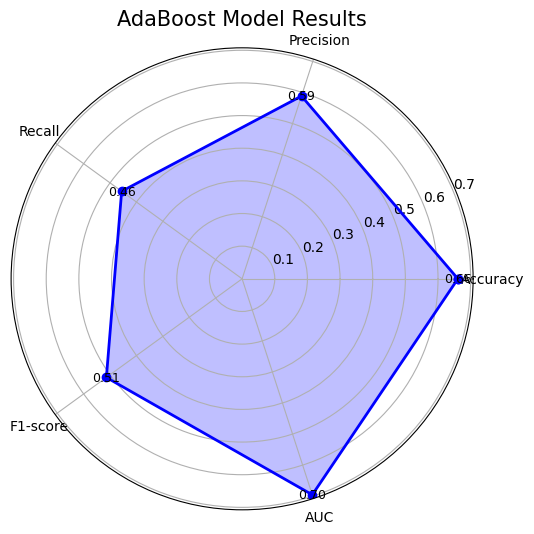

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Model data
labels = np.array(['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
data = [
    np.array([0.671706, 0.615385, 0.43956, 0.512821, 0.685073]),
    np.array([0.609071, 0.501818, 0.758242, 0.603939, 0.683294]),
    np.array([0.647948, 0.585586, 0.357143, 0.443686, 0.672989]),
    np.array([0.658747, 0.596774, 0.406593, 0.48366, 0.693598]),
    np.array([0.634989, 0.539394, 0.489011, 0.512968, 0.672989]),
    np.array([0.643629, 0.559441, 0.43956, 0.492308, 0.655801]),
    np.array([0.660907, 0.588652, 0.456044, 0.513932, 0.695554])
]
models = ["K-Nearest Neighbors", "Naive Bayes", "SVM", "Random Forest", "Decision Tree", "XGBoost", "AdaBoost"]

# Function to create a radar plot for each model
def plot_radar(model_stats, model_name, color='blue'):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    
    stats = np.concatenate((model_stats, [model_stats[0]]))  # Closing the polygon
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, stats, 'o-', linewidth=2, color=color)  # Draw the outline of the radar chart
    ax.fill(angles, stats, alpha=0.25, color=color)  # Fill in the radar chart
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Adding points (values) at each corner
    for angle, label, stat in zip(angles, labels, stats):
        ax.text(angle, stat, f'{stat:.2f}', ha='center', va='center', fontsize=9, color='black')
    
    ax.set_title(f"{model_name} Model Results", position=(0.5, 1.2), fontdict={'fontsize': 15})
    
    plt.show()

# Plot each model's results separately
for stats, model in zip(data, models):
    plot_radar(stats, model)


C:\Users\ajaia\AppData\Local\Temp\ipykernel_5368\3395901310.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', linewidth=2, linestyle='--', color='gray')
C:\Users\ajaia\AppData\Local\Temp\ipykernel_5368\3395901310.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', linewidth=2, linestyle='--', color='gray')


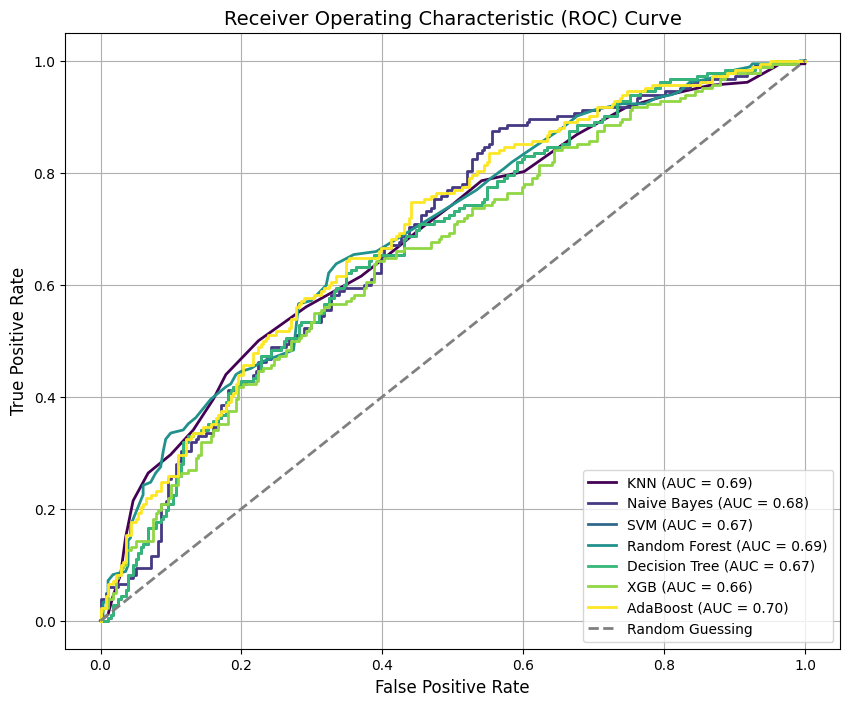

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.cm as cm

models = ['KNN', 'Naive Bayes', 'SVM', 'Random Forest', 'Decision Tree', 'XGB', 'AdaBoost']
probas = [probas0, probas1, probas2, probas3, probas4, probas5, probas6]

# Define colors using Viridis colormap
colors = cm.viridis(np.linspace(0, 1, len(models)))

plt.figure(figsize=(10, 8))
 
for i, model in enumerate(models):
    fpr, tpr, thresholds = roc_curve(y_test, probas[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})', linewidth=2, color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', linewidth=2, linestyle='--', color='gray')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.savefig('ROC.png', format='png', dpi=300)  # Saving the plot as an image
plt.show()


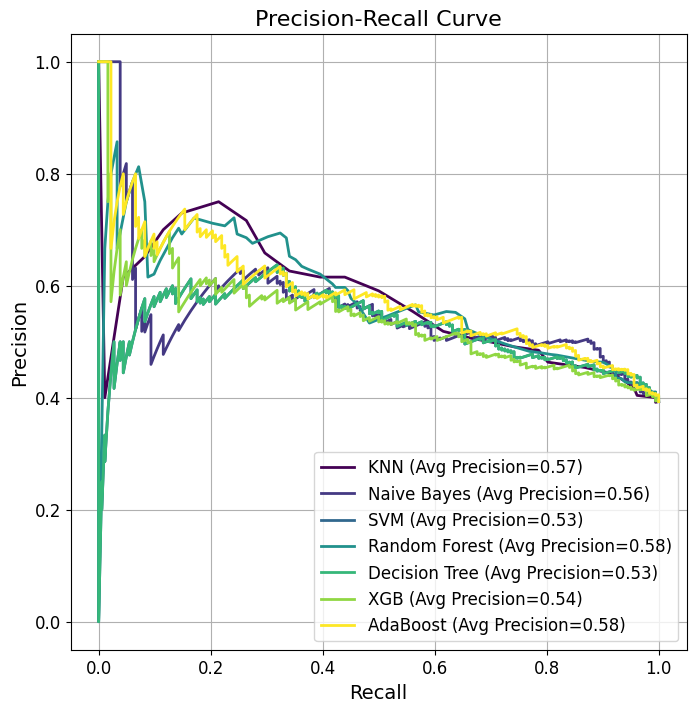

In [103]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

models = ['KNN', 'Naive Bayes', 'SVM', 'Random Forest', 'Decision Tree', 'XGB', 'AdaBoost']
probas = [probas0, probas1, probas2, probas3, probas4, probas5, probas6]

# Define colors using Viridis colormap
colors = cm.viridis(np.linspace(0, 1, len(models)))

plt.figure(figsize=(10, 8))

for i, model in enumerate(models):
    precision, recall, _ = precision_recall_curve(y_test, probas[i][:, 1])
    avg_precision = average_precision_score(y_test, probas[i][:, 1])
    plt.plot(recall, precision, label=f'{model} (Avg Precision={avg_precision:.2f})', color=colors[i], linewidth=2)

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12, bbox_to_anchor=(1, 0))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('Precision_Recall.png', format='png', dpi=300)
plt.show()

